#### Importing Libraries and File Reading

In [33]:
!pip install mplfinance

In [34]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mplfinance as mpf

In [35]:
# configurations for pandas display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None
pd.set_option('max_colwidth', None)

# Disable all warnings
warnings.filterwarnings("ignore")

In [36]:
# install libraries if they are absence
# !pip install mplfinance

In [37]:
silver_price = pd.read_csv('processed_price_silver.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [38]:
silver_price.head(5)

,SF_price,SF_open,SF_high,SF_low,SF_volume,SF_trend,PLT_price,PLT_open,PLT_high,PLT_low,PLT_trend,PLD_price,PLD_open,PLD_high,PLD_low,PLD_trend,RHO_price,GOLD_open,GOLD_high,GOLD_low,GOLD_close,GOLD_ajclose,GOLD_volume,EG_open,EG_high,EG_low,EG_close,EG_ajclose,EG_volume,GDX_open,GDX_high,GDX_low,GDX_close,GDX_ajclose,GDX_volume,SP_open,SP_high,SP_low,SP_close,SP_ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_ajclose,DJ_volume,EU_price,EU_open,EU_high,EU_low,EU_trend,USDI_price,USDI_open,USDI_high,USDI_low,USDI_volume,USDI_trend,OF_price,OF_open,OF_high,OF_low,OF_volume,OF_trend,OS_price,OS_open,OS_high,OS_low,OS_trend,USO_open,USO_high,USO_low,USO_close,USO_ajclose,USO_volume,USB_price,USB_open,USB_high,USB_low,USB_trend
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,53604,54248,54248,52316,119440,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425.0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,74.550003,76.150002,72.150002,72.900002,70.431755,787900,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,1.3018,1.2982,1.3051,1.2957,1,80.341,80.565,80.630,80.130,22850,0,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,1.911,1.911,1.911,1.911,1
2011-12-16,53458,53650,54030,52890,65390,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400.0,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,73.599998,75.099998,73.349998,74.900002,72.364037,896600,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,1.3035,1.3020,1.3087,1.2997,1,80.249,80.175,80.395,79.935,13150,0,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,1.851,1.851,1.851,1.851,0
2011-12-19,52961,53400,53400,52544,67280,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400.0,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,1.2995,1.3043,1.3044,1.2981,0,80.207,80.300,80.470,80.125,970,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,1.810,1.810,1.810,1.810,0
2011-12-20,53487,52795,53575,52595,55130,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400.0,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,66.449997,68.099998,66.000000,67.000000,64.731514,875300,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,1.3079,1.3003,1.3133,1.2994,1,80.273,80.890,80.940,80.035,22950,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,1.927,1.927,1.927,1.927,1
2011-12-21,53148,53519,54184,52937,75950,0,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400.0,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,67.099998,69.400002,66.900002,68.500000,66.180725,837600,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,1.3045,1.3079,1.3197,1.3024,0,80.350,80.105,80.445,79.550,24140,1,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,37.669998,38.240002,37.520000,38.110001,38.110001,1

### 3.3 Finding Correlation

In [39]:
silver_price_corr = silver_price.corrwith(silver_price['SF_price'])

# Convert to dataframe
silver_price_corr_df = silver_price_corr.to_frame(name='Correlation with SF_price')
silver_price_corr_df = silver_price_corr_df.drop('SF_price').sort_values(
                       by='Correlation with SF_price', ascending=False)

# Display the DataFrame
silver_price_corr_df.shape

(79, 1)

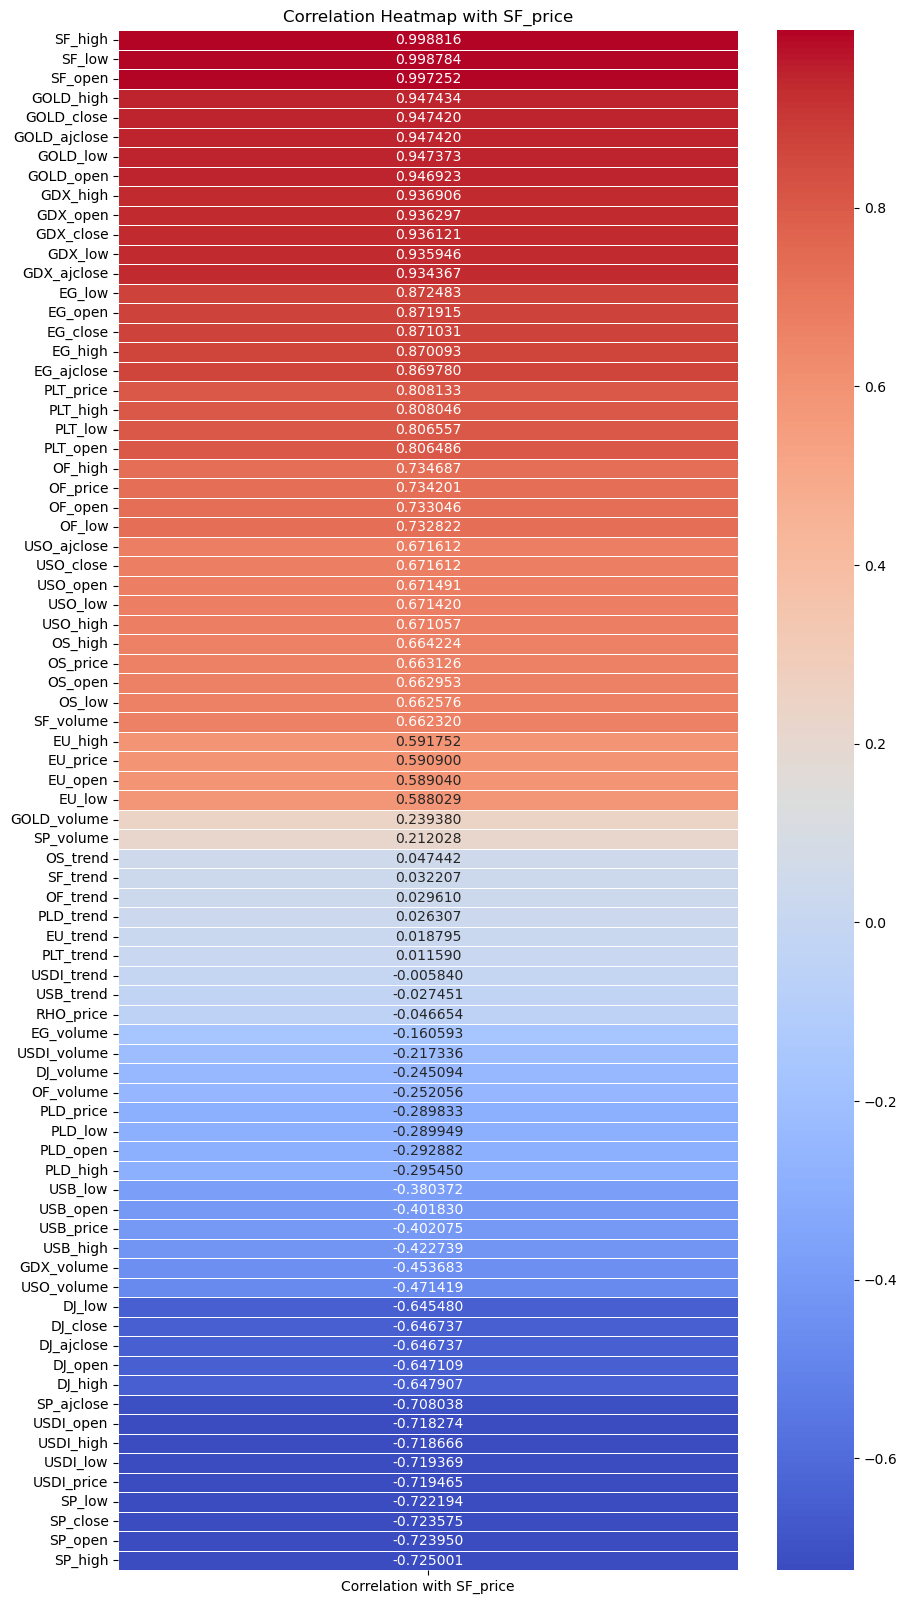

In [40]:
# Create a heatmap for the correlations
plt.figure(figsize=(10, 20))
sns.heatmap(silver_price_corr_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".6f")
plt.title('Correlation Heatmap with SF_price')
plt.show()

In [41]:
silver_price_high_corr_df = silver_price_corr_df[silver_price_corr_df['Correlation with SF_price'] > 0.7]

silver_price_high_corr_df

,Correlation with SF_price
SF_high,0.998816
SF_low,0.998784
SF_open,0.997252
GOLD_high,0.947434
GOLD_close,0.947420
GOLD_ajclose,0.947420
GOLD_low,0.947373
GOLD_open,0.946923
GDX_high,0.936906
GDX_open,0.936297


In [42]:
silver_price_high_corr_df.shape

(26, 1)

#### Now, the 'gold_ajclose_high_corr_df' has only the columns which has > 0.7 correlation with GOLD_ajclose

### 3.4 Train Test Split

#### Two sets of train-test splited datasets:
* **1**: X_all_train, X_all_test, y_all_train, y_all_test (all original columns)
* **2**: X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test (only > 0.7 correlation with GOLD_ajclose columns)

In [43]:
# SILVER_price as the y value 
y = silver_price['SF_price']

In [44]:
# 1: X_all_train, X_all_test, y_all_train, y_all_test

# Splitting the dataset with all features
X_all = silver_price.drop(columns=['SF_price'])  # Exclude the target column
# Perform the train-test split (70% train, 30% test)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.3, random_state=0)

print(X_all_train.shape)
print(X_all_test.shape)
print(y_all_train.shape)
print(y_all_test.shape)

(1202, 79)
(516, 79)
(1202,)
(516,)


In [45]:
# 2: X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test

# Features with correlation > 0.7
high_corr_features = silver_price_high_corr_df[silver_price_high_corr_df['Correlation with SF_price'] > 0.7].index.tolist()
# Splitting the dataset with high correlated features
X_high_corr = silver_price[high_corr_features]
# Perform the train-test split (70% train, 30% test)
X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test = train_test_split(X_high_corr, 
                                                                                            y, test_size=0.3, 
                                                                                            random_state=0)

print(X_high_corr_train.shape)
print(X_high_corr_test.shape)
print(y_high_corr_train.shape)
print(y_high_corr_test.shape)

(1202, 26)
(516, 26)
(1202,)
(516,)


### 3.5 Normalisation

#### 4 sets of train-test splited dataset, with normalised
* **1**: X_all_train, X_all_test, y_all_train, y_all_test (all original columns)
* **1_normalised**: X_all_train_scaled, X_all_test_scaled, y_all_train, y_all_test (all original columns)
------
* **2**: X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test (only > 0.7 correlation with GOLD_ajclose columns)
* **2_normalised**: X_high_corr_train_scaled, X_high_corr_test_scaled, y_high_corr_train, y_high_corr_test (only > 0.7 correlation with GOLD_ajclose columns)

In [46]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [47]:
# For X_all_train and X_all_test
# Fit and transform on the training data
X_all_train_scaled = scaler.fit_transform(X_all_train)
# Transform the test data using the same scaler
X_all_test_scaled = scaler.transform(X_all_test)

In [48]:
# For X_high_corr_train and X_high_corr_test
# Fit and transform on the training data
X_high_corr_train_scaled = scaler.fit_transform(X_high_corr_train)
# Transform the test data using the same scaler
X_high_corr_test_scaled = scaler.transform(X_high_corr_test)

#### --------------------- copy until here first --------------------- modelling still in progress:

## 4. Modelling

### 4.1 GridSearch for Best Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree regressor
dt = DecisionTreeRegressor(random_state=0)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the data with all features
grid_search.fit(X_all_train, y_all_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and fit a Decision Tree model for the dataset with all features
dt_all = DecisionTreeRegressor(random_state=0)
dt_all.fit(X_all_train, y_all_train)

# Make predictions on the test set with all features
y_all_pred = dt_all.predict(X_all_test)

# Calculate the mean squared error for the predictions with all features
mse_all = mean_squared_error(y_all_test, y_all_pred)
print(f"Mean Squared Error (All Features): {mse_all}")

# Create and fit a Decision Tree model for the dataset with high-correlation features
dt_high_corr = DecisionTreeRegressor(random_state=0)
dt_high_corr.fit(X_high_corr_train, y_high_corr_train)

# Make predictions on the test set with high-correlation features
y_high_corr_pred = dt_high_corr.predict(X_high_corr_test)

# Calculate the mean squared error for the predictions with high-correlation features
mse_high_corr = mean_squared_error(y_high_corr_test, y_high_corr_pred)
print(f"Mean Squared Error (High-Correlation Features): {mse_high_corr}")

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the best hyperparameters
best_max_depth = None
best_max_features = 'auto'
best_min_samples_leaf = 2
best_min_samples_split = 5

# Create a Decision Tree model for the dataset with best parameters
dt_all = DecisionTreeRegressor(
    max_depth=best_max_depth,
    max_features=best_max_features,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    random_state=0
)

# fir data to model
dt_all.fit(X_all_train, y_all_train)

# Make predictions on the test set with all features
y_all_pred = dt_all.predict(X_all_test)

# Calculate the mean squared error for the predictions with all features
mse_all = mean_squared_error(y_all_test, y_all_pred)
print(f"Mean Squared Error (All Features): {mse_all}")

# Create and fit a Decision Tree model for the dataset with high-correlation features
dt_high_corr = DecisionTreeRegressor(random_state=0)
dt_high_corr.fit(X_high_corr_train, y_high_corr_train)

# Make predictions on the test set with high-correlation features
y_high_corr_pred = dt_high_corr.predict(X_high_corr_test)

# Calculate the mean squared error for the predictions with high-correlation features
mse_high_corr = mean_squared_error(y_high_corr_test, y_high_corr_pred)
print(f"Mean Squared Error (High-Correlation Features): {mse_high_corr}")

In [ ]:
# KNN

In [ ]:
# Linear Regression

In [ ]:
# SVM

In [ ]:
plt_corr = gold_price.corr().abs()['PLT_Price'].sort_values(ascending = False)
plt_corr

In [ ]:
silver_corr = gold_price.corr().abs()['SF_Price'].sort_values(ascending = False)
silver_corr

In [ ]:
# List of columns you want to keep
columns_to_keep = [
    'Date', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend'
]

# Create the new DataFrame by selecting the desired columns
new_df = gold_price[columns_to_keep]

# Display the first 5 rows (head) of the new DataFrame
print(new_df.tail(10))

In [ ]:
# Define the columns to plot
gold_columns = ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_ajclose', 'GOLD_volume']

gold_plot = gold_price[gold_columns]

# Rename the columns to match default column names
gold_plot.rename(columns={
    'GOLD_open': 'Open',
    'GOLD_high': 'High',
    'GOLD_low': 'Low',
    'GOLD_ajclose': 'Close',
    'GOLD_volume': 'Volume'
}, inplace=True)

# Plot the candlestick chart
mpf.plot(gold_plot, type='candle', title='GOLD Candlestick Chart', style='yahoo', volume=True, ylabel='Price',
         addplot=[mpf.make_addplot(gold_plot['Close'], panel=1, color='g', secondary_y=True)],
         figratio=(10, 6), figsize=(12, 8), tight_layout=True)

In [ ]:
# Filter the DataFrame to include only the desired date range
start_date = '2013-03-10'
end_date = '2013-07-31'
gold_plot_filtered = gold_plot[(gold_plot.index >= start_date) 
                               & (gold_plot.index <= end_date)]

# Plot the candlestick chart with the filtered DataFrame
mpf.plot(gold_plot_filtered, type='candle', title='GOLD Candlestick Chart', style='yahoo', volume=True, ylabel='Price',
         addplot=[mpf.make_addplot(gold_plot_filtered['Close'], panel=1, color='g', secondary_y=True)],
         figratio=(10, 6), figsize=(12, 8), tight_layout=True)

## 5. Evaluation